In [149]:
import numpy as np
from matplotlib import pyplot as plt

# Ejercicio 4

<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\R'
<>:29: SyntaxWarning: invalid escape sequence '\I'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\R'
<>:29: SyntaxWarning: invalid escape sequence '\I'
/tmp/ipykernel_3329/1860515047.py:19: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_ylabel('$H(e^{j\omega})$ [dB]')
/tmp/ipykernel_3329/1860515047.py:20: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('$\omega/2\pi$')
/tmp/ipykernel_3329/1860515047.py:28: SyntaxWarning: invalid escape sequence '\R'
  ax2.set_xlabel('$\Re(z)$')
/tmp/ipykernel_3329/1860515047.py:29: SyntaxWarning: invalid escape sequence '\I'
  ax2.set_ylabel('$\Im(z)$')


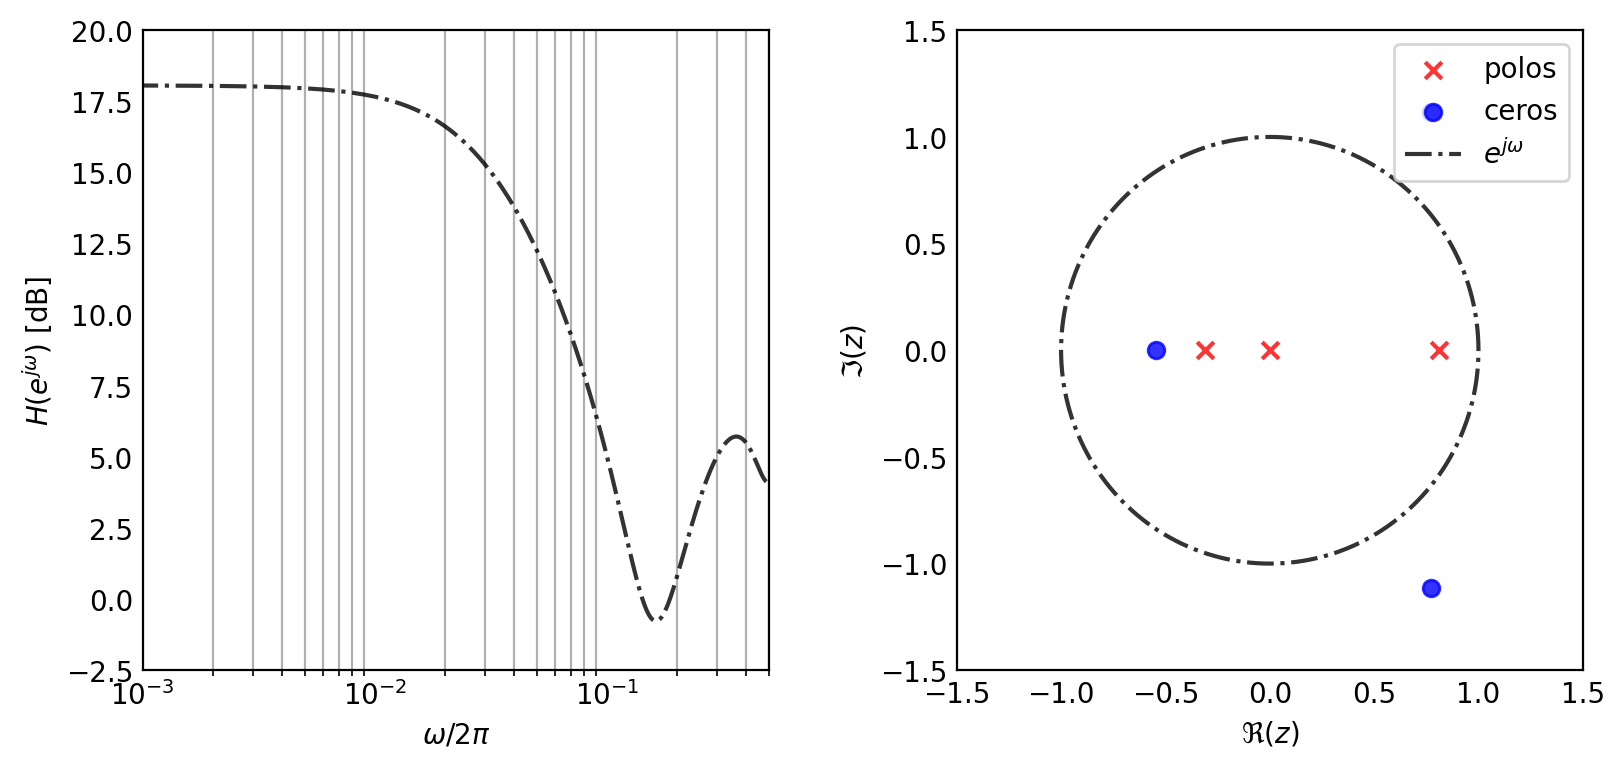

In [159]:
N = 1001
w = np.linspace(0, 0.5, N)
z = np.exp(1j*2*np.pi*w) # circulo unitario
H = (1 - z**(-1) + z**(-2) + z**(-3))/(1 - 0.5 * z**(-1) - 0.25 * z**(-2))

p1 = -0.30902
p2 = 0.80902
p3 = 0
z1 = 0.77184 + 1j*1.11514
z2 = 0.77184 - 1j*1.11514
z3 = -0.54369

circ = np.exp(1j*2*np.pi*np.linspace(0, 1, 1000))

plt.figure(figsize=(9, 4), dpi=200)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.semilogx(w, 20*np.log10(np.abs(H)), '-.', color='black', alpha=0.8)
ax1.set_ylabel('$H(e^{j\omega})$ [dB]')
ax1.set_xlabel('$\omega/2\pi$')
ax1.set_xlim(1e-3, 0.5)
ax1.set_ylim(-2.5, 20)
ax2.scatter(np.real([p1, p2, p3]), np.imag([p1, p2, p3]), marker='x', color='red', alpha=0.8, label ='polos')
ax2.scatter(np.real([z1, z2, z3]), np.imag([z1, z2, z3]), marker='o', color='blue', alpha=0.8, label ='ceros')
ax2.plot(np.real(circ), np.imag(circ), '-.', color='black', alpha=0.8, label='$e^{jω}$')
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel('$\Re(z)$')
ax2.set_ylabel('$\Im(z)$')
ax2.legend(loc='upper right')
ax1.grid(which='both', axis='both')
ax2.grid(which='both', axis='both')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.4)
plt.show()

In [160]:
import numpy as np

N   = 61 # número de muestras
NBX = 8  # bits de la entrada
S = 0    # signo (1: con signo, 0: sin signo)

n = np.linspace(-(N//2), N//2, N) # eje de tiempo discreto
x = np.concat((np.zeros(N//2), np.ones(N - N//2))) * (-1)**S * (2**(NBX - 1) - 1) # escalón
y = np.zeros(N) # inicialización de la salida

num = [1, -1, 1, 1]  # coeficientes del numerador
den = [1, 0.5, 0.25] # coeficientes del denominador

y = np.convolve(x, num, 'full')[:N] # convolución con el numerador
y = np.convolve(y, den, 'full')[:N] # convolución con el denominador

NBY = np.ceil(np.log2(max(abs(y)))) + 1  # bits de salida requeridos

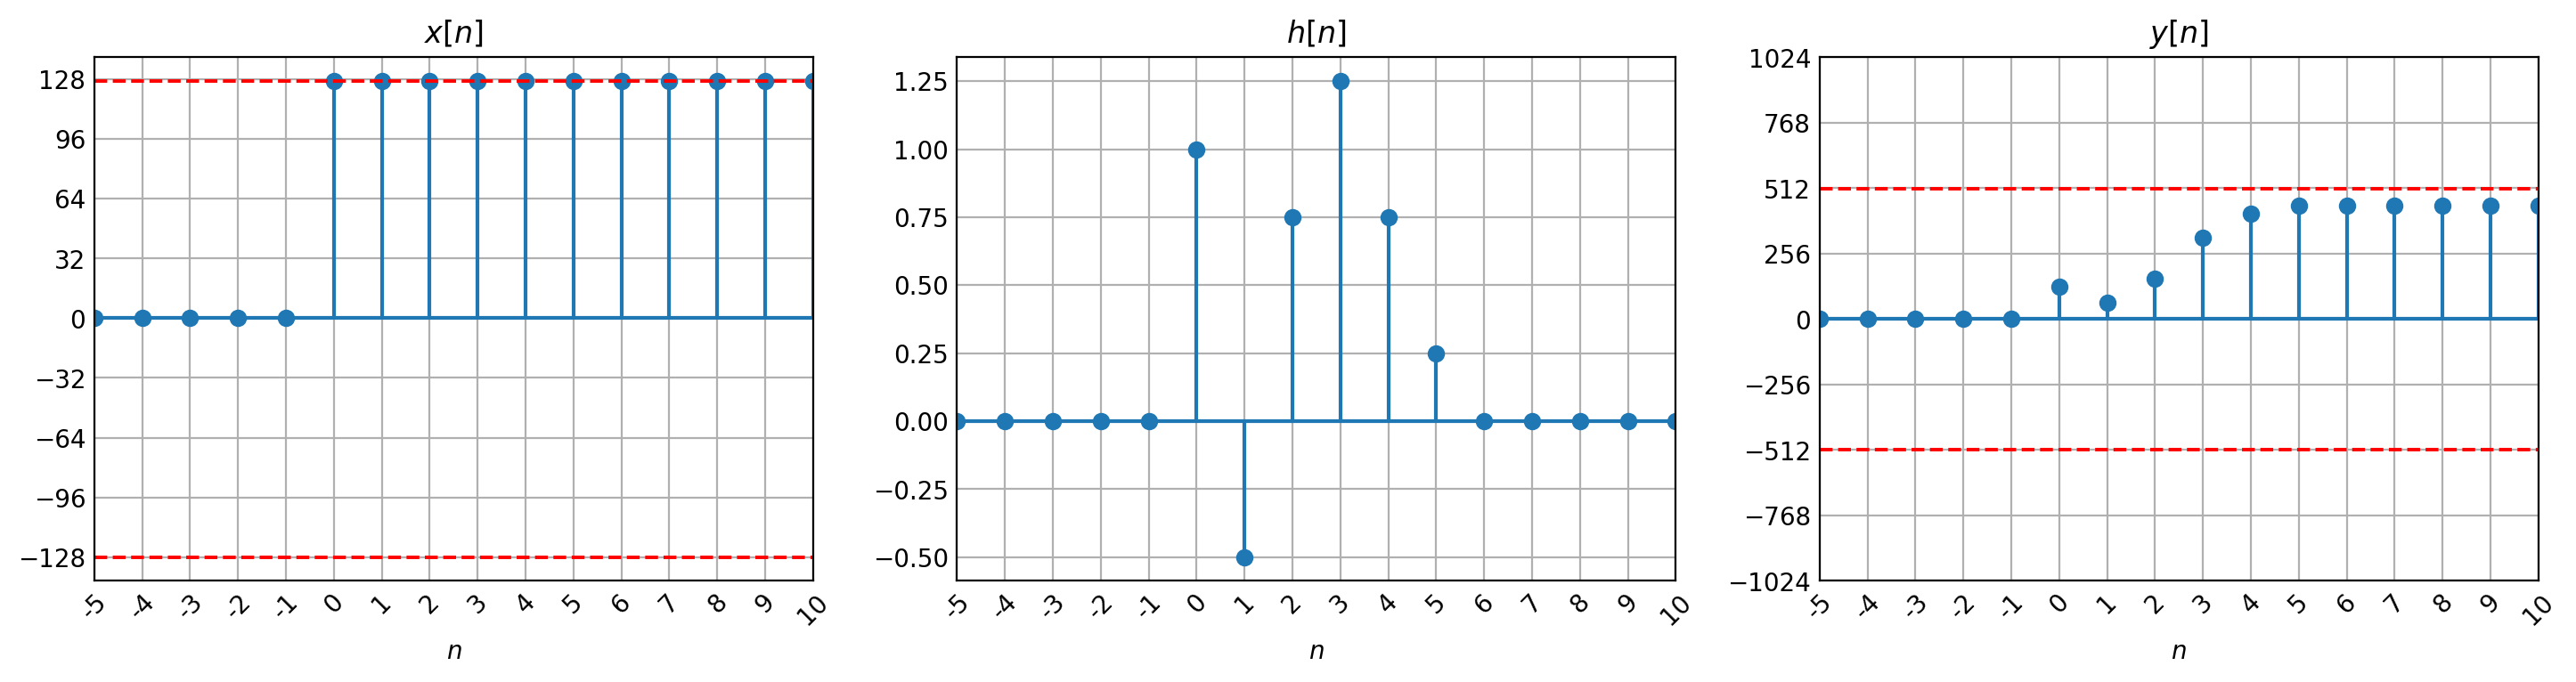

In [163]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14, 3), dpi=200)
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
ax1.hlines(2**(NBX - 1) - 1, -5, 10, color='red', lw=1.4, ls='--')
ax1.hlines(-2**(NBX - 1), -5, 10, color='red', lw=1.4, ls='--')
ax2.stem(n, h, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
ax3.stem(n, y, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
ax3.hlines(2**(NBY - 1) - 1, -5, 10, color='red', lw=1.4, ls='--')
ax3.hlines(-2**(NBY - 1), -5, 10, color='red', lw=1.4, ls='--')
ax1.set_xlim(-5, 10)
ax2.set_xlim(-5, 10)
ax3.set_xlim(-5, 10)
ax1.set_xlabel('$n$')
ax2.set_xlabel('$n$')
ax3.set_xlabel('$n$')
ax1.set_title('$x[n]$')
ax2.set_title('$h[n]$')
ax3.set_title('$y[n]$')
ax1.set_yticks(np.arange(-128, 129, 32))
ax1.set_xticks(np.arange(-5, 11, 1), np.arange(-5, 11, 1), rotation=45)
ax2.set_xticks(np.arange(-5, 11, 1), np.arange(-5, 11, 1), rotation=45)
ax3.set_yticks(np.arange(-1024, 1025, 256))
ax3.set_xticks(np.arange(-5, 11, 1), np.arange(-5, 11, 1), rotation=45)
#ax1.grid()
#ax2.grid()
#ax3.grid()
plt.show()

In [164]:
N   = 61 # número de muestras
NBX = 8  # bits de la entrada
S = 0    # signo (1: con signo, 0: sin signo)

n = np.linspace(-(N//2), N//2, N) # eje de tiempo discreto
x = np.concat((np.zeros(N//2), np.array([1, 1, 1, 1, -1, 1]), np.zeros(N//2-5))) * (-1)**S * (2**(NBX - 1) - 1)
y = np.zeros(N) # inicialización de la salida

b = [1, -1, 1, 1]
a = [1, 0.5, 0.25]

h = np.convolve(a, b, 'full')[:N] # respuesta al impulso
y = np.convolve(x, h, 'full')[:N] # convolución con el numerador

h = np.concat((np.zeros(N//2), h, np.zeros(N//2 - len(h) + 1))) # ajustar tamaño de h

NBY = np.ceil(np.log2(max(abs(y)))) + 1  # bits de salida requeridos

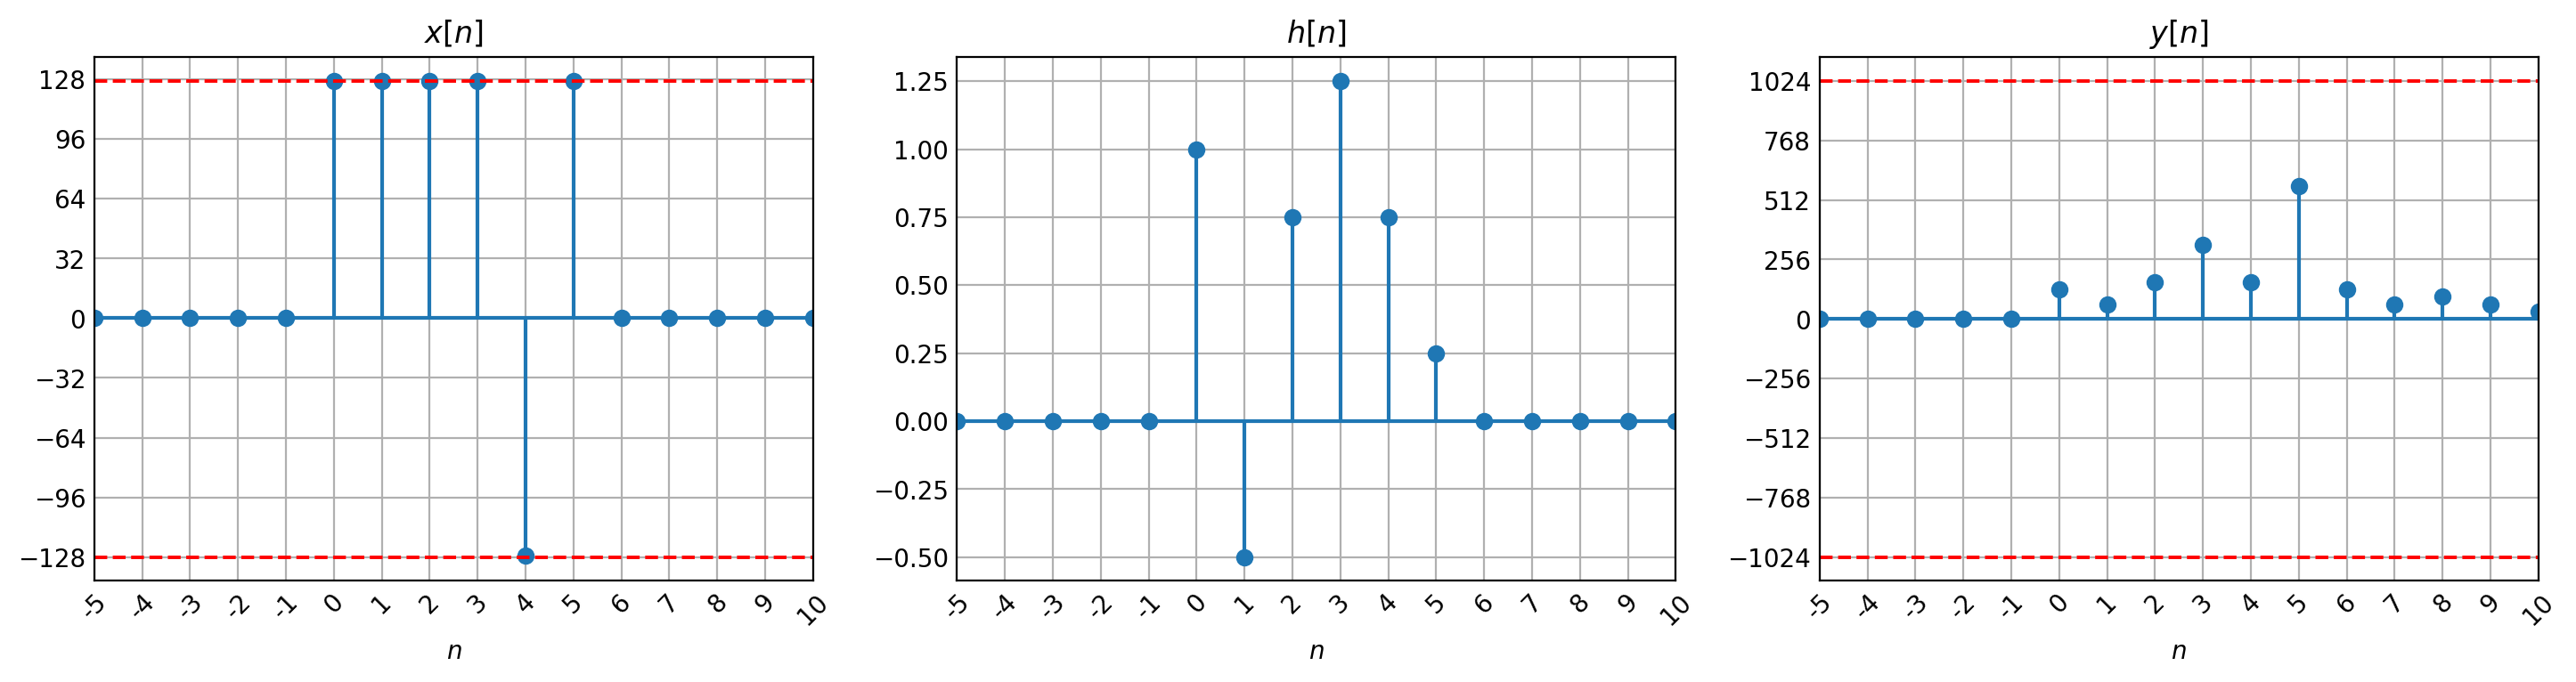

In [166]:
plt.figure(figsize=(14, 3), dpi=200)
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
ax1.hlines(2**(NBX - 1) - 1, -5, 10, color='red', lw=1.4, ls='--')
ax1.hlines(-2**(NBX - 1), -5, 10, color='red', lw=1.4, ls='--')
ax2.stem(n, h, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
ax3.stem(n, y, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
ax3.hlines(2**(NBY - 1) - 1, -5, 10, color='red', lw=1.4, ls='--')
ax3.hlines(-2**(NBY - 1), -5, 10, color='red', lw=1.4, ls='--')
ax1.set_xlim(-5, 10)
ax2.set_xlim(-5, 10)
ax3.set_xlim(-5, 10)
ax1.set_xlabel('$n$')
ax2.set_xlabel('$n$')
ax3.set_xlabel('$n$')
ax1.set_title('$x[n]$')
ax2.set_title('$h[n]$')
ax3.set_title('$y[n]$')
ax1.set_yticks(np.arange(-128, 129, 32))
ax1.set_xticks(np.arange(-5, 11, 1), np.arange(-5, 11, 1), rotation=45)
ax2.set_xticks(np.arange(-5, 11, 1), np.arange(-5, 11, 1), rotation=45)
ax3.set_yticks(np.arange(-1024, 1025, 256))
ax3.set_xticks(np.arange(-5, 11, 1), np.arange(-5, 11, 1), rotation=45)
#ax1.grid()
#ax2.grid()
#ax3.grid()
plt.show()